In [1]:
import numpy as np

import pandas as pd

import json

import copy

import math


import numpy as np
import matplotlib.pyplot as plt

import statistics


In [2]:
def get_average_and_std(lst):
    return(sum(lst)/len(lst), statistics.stdev(lst))

In [3]:


def import_log(filepath):
    df = pd.read_csv(filepath)
    return(df.values.tolist())

def remove_nan(lists):
    newlists = []
    for tr in lists:
        newlists.append([int(x) for x in tr if str(x) != 'nan'])
    return(newlists)



def delete_variant(log, variant):
    return([trace for trace in log if trace != variant])

def get_variants_list(lst): #get all of the variants in a list, return as list
    st = set(tuple(i) for i in lst) #convert list into set of tuples
    lst2 = list(st) #convert set of tuples into lsit of tuples
    return [list(e) for e in lst2] 

def count_variant(log, variant): #count how many times a variant comes up in list
    c = 0
    for trace in log:
        if trace == variant:
            c += 1
    return(c)

def compare_variants(var1, var2): #compare two logs, what comes up in the other 
    s1 = set(tuple(i) for i in var1)
    s2 = set(tuple(i) for i in var2)
    
   # print("Missing values in second list:", (s1.difference(s2))) 
   # print("Additional values in second list:", (s2.difference(s1))) 
    
    return([list(e) for e in list(s1.difference(s2))],[list(e) for e in list(s2.difference(s1))])

def demap_trace(t, mapping): #unmap trace, from number encoding to activity label
    map = {v: k for k, v in mapping.items()}
    return [map[a] for a in t]



def apply_integer_map(log, map):
    return [[map[a['concept:name']] for a in t] for t in log]

#fucntion gets the counts of all of the variants 

def get_counts(log, variants):
    counts = []
    for var in variants:
        counts.append(count_variant(log, var))
    return counts


def get_fitness(occ_each_trvar_sim, occ_each_trvar_tr):
    arr = [min(occ_each_trvar_sim[i], occ_each_trvar_tr[i])/sum(occ_each_trvar_tr) for i in range(0, len(occ_each_trvar_sim))]
    return sum(arr)

def get_precision(occ_each_simvar_sim, occ_each_simvar_trte):
    arr = [min(occ_each_simvar_sim[i], occ_each_simvar_trte[i])/sum(occ_each_simvar_sim) for i in range(0, len(occ_each_simvar_sim))]
    return sum(arr)

def get_generalization(occ_each_tevar_sim, occ_each_tevar_te):
    arr = [min(occ_each_tevar_sim[i], occ_each_tevar_te[i])/sum(occ_each_tevar_te) for i in range(0, len(occ_each_tevar_sim))]
    return sum(arr)

In [4]:
def get_metrics(filename):
    
    variants = remove_nan(import_log(filename+'/variants.csv'))
    traintestlog = remove_nan(import_log(filename+'/Full_traintest_log.csv'))
    
    overall_counts = get_counts(traintestlog, variants)
    
    fitness_arr = []
    precision_arr = []
    generalization_arr = []
    
    counts_te = [0]*len(variants)
    counts_av = [0]*len(variants)

    for variant in range(0,len(variants)):
        trainname = filename+'/Train_sets/log_'+str(variant)+'.csv'
        trainlog = remove_nan(import_log(trainname))

        SimLogName = filename+'/Sim_sets/log_'+str(variant)+'.csv'
        simlog = remove_nan(import_log(SimLogName))
        
        TestLogName = filename+'/Test_sets/log_'+str(variant)+'.csv'
        testlog = remove_nan(import_log(TestLogName))
        
        #to update counts
        allvar_counts_sim = get_counts(simlog, variants)
        counts_te[variant] = allvar_counts_sim[variant]
        allvar_counts_sim[variant] = 0
        counts_av = [sum(x) for x in zip(counts_av, allvar_counts_sim)]
    
        
        #needed to calculate metrics
        trvar = get_variants_list(trainlog)
        simvar = get_variants_list(simlog)
        tevar = get_variants_list(testlog) #this is unique tot eh one-hot seting, needs to be altered when using bigger test set

        #get counts for the simulated log
        occ_each_trvar_sim = get_counts(simlog, trvar)
        occ_each_tevar_sim = get_counts(simlog, tevar)
        occ_each_simvar_sim = get_counts(simlog, simvar)

        #get counts for the train log
        occ_each_trvar_tr = get_counts(trainlog, trvar)

        #get counts for the test log
        occ_each_tevar_te = get_counts(testlog, tevar)

        #get counts for the train test log
        occ_each_simvar_trte = get_counts(traintestlog, simvar)

        fitness_arr.append(get_fitness(occ_each_trvar_sim, occ_each_trvar_tr))
        precision_arr.append(get_precision(occ_each_simvar_sim, occ_each_simvar_trte))
        generalization_arr.append(get_generalization(occ_each_tevar_sim, occ_each_tevar_te))

    av_gen = sum(generalization_arr)/len(variants)
    av_prec = sum(precision_arr)/len(variants)
    av_fit = sum(fitness_arr)/len(variants)
    
    
    counts_av = [number / (len(variants)-1) for number in counts_av]
    
    print("precision:", get_average_and_std(precision_arr))
    print("fitness:", get_average_and_std(fitness_arr))
    print("generalization:", get_average_and_std(generalization_arr))
    
    return(av_gen, av_prec, av_fit, counts_av, counts_te, overall_counts)

In [5]:
variants = remove_nan(import_log('IOR_full_variants'+'/variants.csv'))

In [6]:
print(variants)

[[4, 10, 6, 14, 11, 18, 5, 8, 17, 3, 15, 7, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 3, 15, 7, 12, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 3, 15, 7, 13, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 3, 15, 7, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 2, 3, 15, 7, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 2, 3, 15, 7, 12, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 2, 3, 15, 7, 13, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 17, 2, 3, 15, 7, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 3, 15, 7, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 3, 15, 7, 12, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 3, 15, 7, 13, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 3, 15, 7, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 17, 3, 15, 7, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 17, 3, 15, 7, 12, 13, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 17, 3, 15, 7, 13, 12, 16, 9, 1], [4, 10, 6, 14, 11, 18, 5, 8, 2, 17, 3, 15, 7, 13, 16, 9, 1], [4, 10, 6, 14, 18, 

In [7]:
gen, prec, fit, counts, testcounts, overall_counts = get_metrics('IOR_full_variants')

precision: (0.946748697916667, 0.0070453070829587456)
fitness: (0.9504679221690834, 0.0046112116208474946)
generalization: (0.7492331537154316, 0.1346009996448589)


In [8]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.779027128656243


In [9]:
print(gen, prec, fit)

0.7492331537154316 0.946748697916667 0.9504679221690834


In [10]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.779027128656243


In [11]:
print(len(counts))

64


In [12]:
overall_counts, counts, testcounts = zip(*sorted(zip(overall_counts, counts, testcounts), reverse=True))

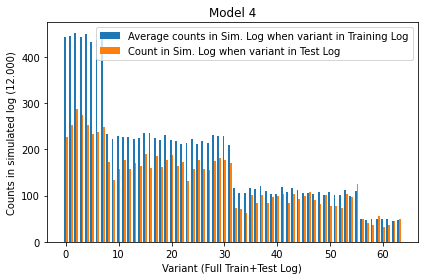

In [13]:
x = np.arange(len(counts))


width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Average counts in Sim. Log when variant in Training Log')
rects2 = ax.bar(x + width/2, testcounts, width, label='Count in Sim. Log when variant in Test Log')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in simulated log (12.000)')
ax.set_xlabel('Variant (Full Train+Test Log)')
ax.set_title('Model 4')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
ax.legend()


fig.tight_layout()

plt.savefig('Plot_Model4.pdf')

plt.show()

In [14]:
gen, prec, fit, counts, testcounts, overall_counts = get_metrics('Loop3x2_full_variants')  #have to change -> more variants possible than variants

precision: (0.928712962962961, 0.012993862237243196)
fitness: (0.9310744742301992, 0.005461913829492022)
generalization: (0.9226935438232521, 0.10631170726940714)


In [15]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.9302607058094888


In [16]:
print(gen, prec, fit)

0.9226935438232521 0.928712962962961 0.9310744742301992


In [17]:
overall_counts, counts, testcounts = zip(*sorted(zip(overall_counts, counts, testcounts), reverse=True))

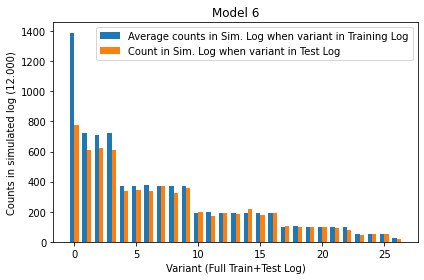

In [18]:
x = np.arange(len(counts))

width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Average counts in Sim. Log when variant in Training Log')
rects2 = ax.bar(x + width/2, testcounts, width, label='Count in Sim. Log when variant in Test Log')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in simulated log (12.000)')
ax.set_xlabel('Variant (Full Train+Test Log)')
ax.set_title('Model 6')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
ax.legend()


fig.tight_layout()

plt.savefig('Plot_Model6.pdf')

plt.show()

In [19]:
gen, prec, fit, counts, testcounts, overall_counts = get_metrics('Parallel_full_variants')

precision: (0.9397222222222225, 0.0033848838282824756)
fitness: (0.9410368611547705, 0.003431786370130281)
generalization: (0.7916998098760157, 0.12122158317999344)


In [20]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.7882175134259372


In [21]:
print(gen, prec, fit)

0.7916998098760157 0.9397222222222225 0.9410368611547705


In [22]:
overall_counts, counts, testcounts = zip(*sorted(zip(overall_counts, counts, testcounts), reverse=True))

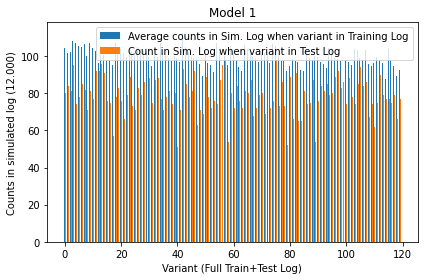

In [23]:
x = np.arange(len(counts))



width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Average counts in Sim. Log when variant in Training Log')
rects2 = ax.bar(x + width/2, testcounts, width, label='Count in Sim. Log when variant in Test Log')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in simulated log (12.000)')
ax.set_xlabel('Variant (Full Train+Test Log)')
ax.set_title('Model 1')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
ax.legend()


fig.tight_layout()

plt.savefig('Plot_Model1.pdf')

plt.show()

In [24]:
gen, prec, fit, counts, testcounts, overall_counts = get_metrics('XOR_full_variants')

precision: (0.9422128906249997, 0.003222005900784246)
fitness: (0.9424303182661878, 0.0032924588237100154)
generalization: (0.9206069008882375, 0.0925707393396214)


In [25]:
print(gen, prec, fit)

0.9206069008882375 0.9422128906249997 0.9424303182661878


In [26]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.9532974425727953


In [27]:
overall_counts, counts, testcounts = zip(*sorted(zip(overall_counts, counts, testcounts), reverse=True))

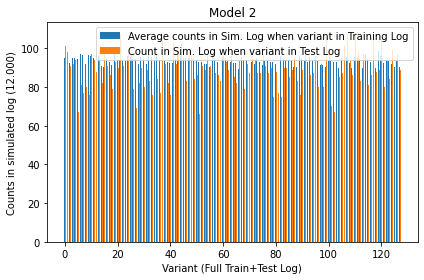

In [28]:
x = np.arange(len(counts))


width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Average counts in Sim. Log when variant in Training Log')
rects2 = ax.bar(x + width/2, testcounts, width, label='Count in Sim. Log when variant in Test Log')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in simulated log (12.000)')
ax.set_xlabel('Variant (Full Train+Test Log)')
ax.set_title('Model 2')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
ax.legend()


fig.tight_layout()

plt.savefig('Plot_Model2.pdf')

plt.show()

In [29]:
gen, prec, fit, counts, testcounts, overall_counts = get_metrics('XOR+dep_full_variants')

precision: (0.9388157552083338, 0.003286625718198113)
fitness: (0.9390922420219172, 0.0034722339876190303)
generalization: (0.9117133722550925, 0.10192430871735648)


In [30]:
print(gen, prec, fit)

0.9117133722550925 0.9388157552083338 0.9390922420219172


In [31]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.9408337015778031


In [32]:
overall_counts, counts, testcounts = zip(*sorted(zip(overall_counts, counts, testcounts), reverse=True))

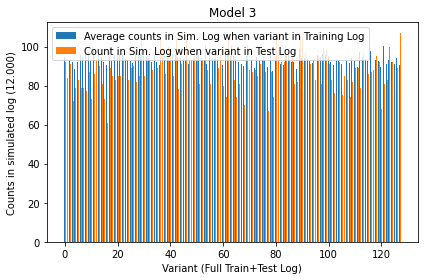

In [33]:
x = np.arange(len(counts))


width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Average counts in Sim. Log when variant in Training Log')
rects2 = ax.bar(x + width/2, testcounts, width, label='Count in Sim. Log when variant in Test Log')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in simulated log (12.000)')
ax.set_xlabel('Variant (Full Train+Test Log)')
ax.set_title('Model 3')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
ax.legend()



fig.tight_layout()

plt.savefig('Plot_Model3.pdf')

plt.show()

In [34]:
gen, prec, fit, counts, testcounts, overall_counts = get_metrics('Parallel2')

precision: (0.9210707671957666, 0.006313381445261221)
fitness: (0.9241862270138057, 0.005340248617488429)
generalization: (0.6793637525015513, 0.20892421901632455)


In [35]:
print(gen, prec, fit)

0.6793637525015513 0.9210707671957666 0.9241862270138057


In [36]:
ratio = 0
for i in range(len(counts)):
    ratio += testcounts[i]/counts[i]
ratio = ratio/len(counts)

print(ratio)

0.686556423358751


In [37]:
overall_counts, counts, testcounts = zip(*sorted(zip(overall_counts, counts, testcounts), reverse=True))

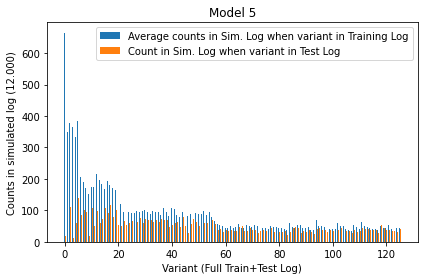

In [38]:
x = np.arange(len(counts))
#x = np.arange(20)

width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, counts, width, label='Average counts in Sim. Log when variant in Training Log')
rects2 = ax.bar(x + width/2, testcounts, width, label='Count in Sim. Log when variant in Test Log')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts in simulated log (12.000)')
ax.set_xlabel('Variant (Full Train+Test Log)')
ax.set_title('Model 5')
#ax.set_xticks(x)
#ax.set_xticklabels(x)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('Plot_Model5.pdf')

plt.show()